<center><img src="Imagenes/tarea_circ_cuad.pdf"/></center>


## Librerias Necesarias

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import random

## Funciones Necesarias

In [2]:
# Clacular distancia euclidiana de un punto rectangular a otro
def euclidianDistance(point1, point2):
    d2 = (point1[0]-point2[0])**2 + (point1[1]-point2[1])**2
    return np.sqrt(d2)

# Coordenadas polares a coordenadas rectangulares
def pol2cart(rad, ang):
    x = rad * np.cos(ang*np.pi/180)
    y = rad * np.sin(ang*np.pi/180)
    return(round(x,3), round(y,3))

# Coordenadas rectangulares a coordenadas polares
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x) * 180/np.pi
    return(round(rho,3), round(phi,1))

# Funcion para calcular la distancia esperada hacia los demas puntos
def expectedDistance(points):
    expectedList = []
    # Hace una iterecion tomando referencia sobre cada punto
    for i,refPoint in enumerate(points):
        distSum = 0
        # Se suma la distancia del punto de referencia
        # a cada uno de los de los puntos restantes
        for point in points[:i]+points[i+1:]:
            distSum += euclidianDistance(refPoint, point)
        # Se obtiene la distancia esperada dividiendo la suma
        # de las distancia sobre el numero de puntos
        expectedDist = distSum/n
        expectedList.append(expectedDist)
        
        polarPoints = [cart2pol(x, y)for x,y in points]

    return pd.DataFrame({'x':[p[0] for p in points],
                         'y':[p[1] for p in points],
                         'r':[p[0] for p in polarPoints],
                         'theta':[p[1] for p in polarPoints],
                         'Distancia Esperada':expectedList})

## a) Se obtienen los 18 puntos alrededor del prerimetro de un circulo separados a la misma distancia

In [3]:
# Numero de puntos
n = 18

# Angulo de separacion
angSep = 360/n

# Se crean n puntos sobre el perimetro de un circulo con radio r 
# separados a la misma distancia 
r = 1

# Se obtiene el primer angulo de manera aleatoria
initialPoint = random.randint(0,360)

# Se obtienen los angulos de cada uno de los n puntos
anglesOfPoint = [(initialPoint + angSep*ag)%360 for ag in range(n)]

# Se obtienen las cordenadas rectangulares de cada uno de los puntos
a_rectPoints = [pol2cart(r,angle) for angle in anglesOfPoint]

In [4]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_A =expectedDistance(a_rectPoints)
expected_A

,x,y,r,theta,Distancia Esperada
0,-0.326,0.946,1.001,109.0,1.270453
1,-0.629,0.777,1.000,129.0,1.269886
2,-0.857,0.515,1.000,149.0,1.270002
3,-0.982,0.191,1.000,169.0,1.270373
4,-0.988,-0.156,1.000,-171.0,1.270308
5,-0.875,-0.485,1.000,-151.0,1.270460
6,-0.656,-0.755,1.000,-131.0,1.270301
7,-0.358,-0.934,1.000,-111.0,1.270318
8,-0.017,-1.000,1.000,-91.0,1.270199
9,0.326,-0.946,1.001,-71.0,1.270453


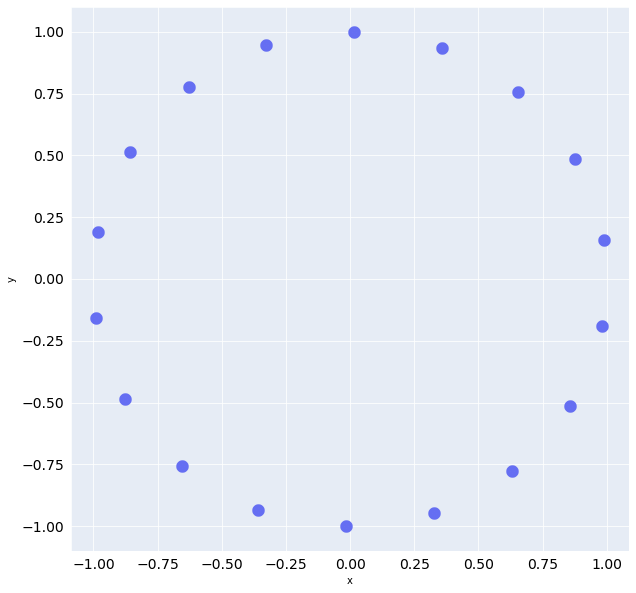

In [45]:
fig = plt.figure()
#fig.patch.set_facecolor('#23252F')
#fig.patch.set_facecolor((35/255,37/255,47/255))
ax = fig.add_subplot()
ax.set_facecolor((230/255,236/255,245/255))
ax.grid(c='white',which='both')
ax.tick_params(axis='x', colors='k',labelsize=14, grid_color='white')
ax.tick_params(axis='y', colors='k',labelsize=14, grid_color='white')
ax.tick_params(tick1On=False)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
ax.set_axisbelow(True)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
expected_A.plot(kind='scatter', color=(101/255,110/255,242/255),
                x='x',y='y', linewidths=8,
                figsize=(10,10), grid=True, ax=ax);

## b) Utilizando los puntos del inciso anterior se agrega un punto en (0,0)

In [6]:
# Se hace una copia de los puntos anteriores
b_rectPoints = a_rectPoints.copy()
# Se agrega el nuevo punto
b_rectPoints.append((0.0,0.0))

In [7]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_B = expectedDistance(b_rectPoints)
expected_B

,x,y,r,theta,Distancia Esperada
0,-0.326,0.946,1.001,109.0,1.326042
1,-0.629,0.777,1.000,129.0,1.325424
2,-0.857,0.515,1.000,149.0,1.325549
3,-0.982,0.191,1.000,169.0,1.325950
4,-0.988,-0.156,1.000,-171.0,1.325877
5,-0.875,-0.485,1.000,-151.0,1.326039
6,-0.656,-0.755,1.000,-131.0,1.325867
7,-0.358,-0.934,1.000,-111.0,1.325888
8,-0.017,-1.000,1.000,-91.0,1.325763
9,0.326,-0.946,1.001,-71.0,1.326042


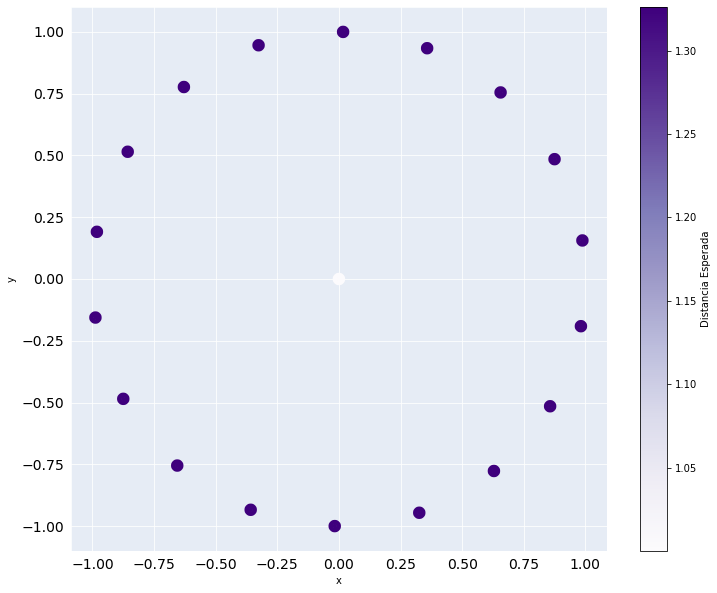

In [54]:
fig = plt.figure()
#fig.patch.set_facecolor('#23252F')
#fig.patch.set_facecolor((35/255,37/255,47/255))
ax = fig.add_subplot()
ax.set_facecolor((230/255,236/255,245/255))
ax.grid(c='white',which='both')
ax.tick_params(axis='x', colors='k',labelsize=14, grid_color='white')
ax.tick_params(axis='y', colors='k',labelsize=14, grid_color='white')
ax.tick_params(tick1On=False)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('k')
ax.set_axisbelow(True)
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
expected_B.plot(kind='scatter',
                x='x',y='y', linewidths=8,
                figsize=(12,10), grid=True, ax=ax,
                c='Distancia Esperada', cmap='Purples');

## c) Utilizando los puntos del inciso 'a' se agrega un punto en (0,1.5)

In [9]:
# Se hace una copia de los puntos del inciso a
c_rectPoints = a_rectPoints.copy()
# Se agrega el nuevo punto
c_rectPoints.append((1.5,0.0))

In [10]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_C = expectedDistance(c_rectPoints)
expected_C

,x,y,r,theta,Distancia Esperada
0,-0.326,0.946,1.001,109.0,1.384703
1,-0.629,0.777,1.000,129.0,1.395795
2,-0.857,0.515,1.000,149.0,1.404036
3,-0.982,0.191,1.000,169.0,1.408669
4,-0.988,-0.156,1.000,-171.0,1.408802
5,-0.875,-0.485,1.000,-151.0,1.405127
6,-0.656,-0.755,1.000,-131.0,1.397211
7,-0.358,-0.934,1.000,-111.0,1.385848
8,-0.017,-1.000,1.000,-91.0,1.371140
9,0.326,-0.946,1.001,-71.0,1.354215


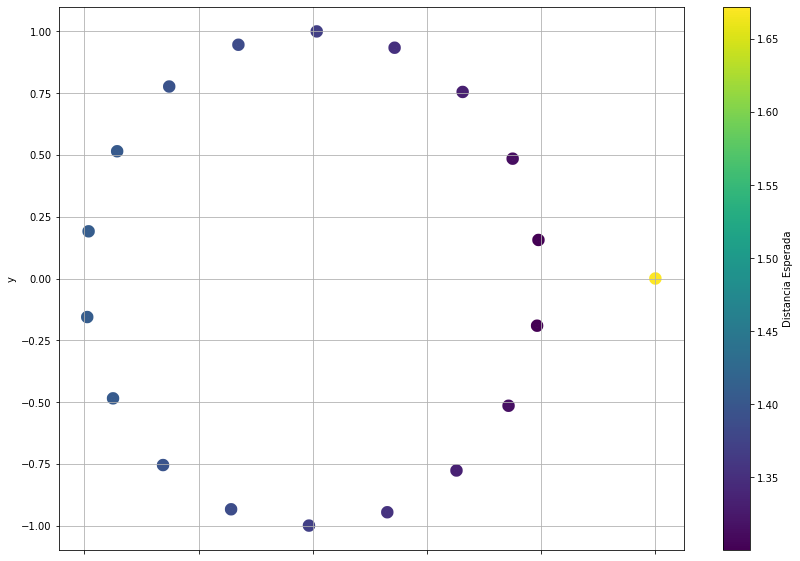

In [11]:
expected_C.plot(kind='scatter',
                x='x',y='y', linewidths=8,
                figsize=(14,10), grid=True,
                c='Distancia Esperada', cmap='viridis');

## d) Utilizando los puntos del inciso 'a' se elimina un punto de estos.

In [12]:
# Se ace una copia de los puntos del inciso a
d_rectPoints = a_rectPoints.copy()
# Se agrega el nuevo punto
d_rectPoints.pop();

In [13]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_D = expectedDistance(d_rectPoints)
expected_D

,x,y,r,theta,Distancia Esperada
0,-0.326,0.946,1.001,109.0,1.251163
1,-0.629,0.777,1.000,129.0,1.231919
2,-0.857,0.515,1.000,149.0,1.214472
3,-0.982,0.191,1.000,169.0,1.198956
4,-0.988,-0.156,1.000,-171.0,1.185209
5,-0.875,-0.485,1.000,-151.0,1.174220
6,-0.656,-0.755,1.000,-131.0,1.165878
7,-0.358,-0.934,1.000,-111.0,1.160872
8,-0.017,-1.000,1.000,-91.0,1.159072
9,0.326,-0.946,1.001,-71.0,1.160988


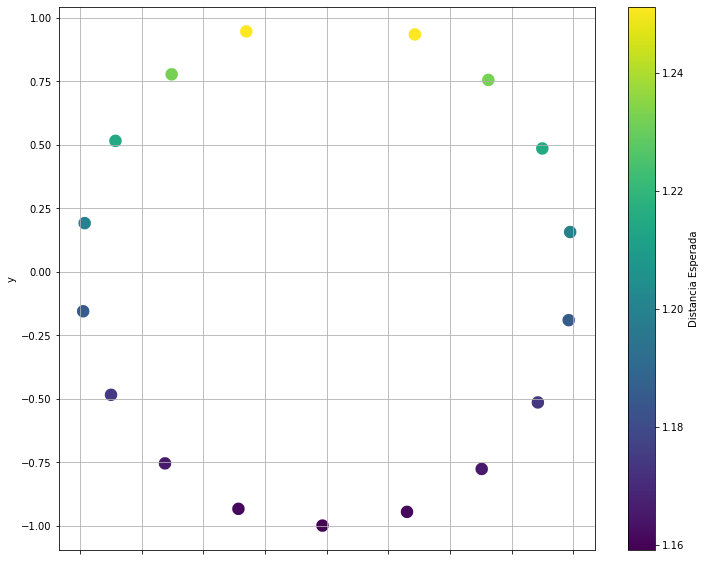

In [14]:
expected_D.plot(kind='scatter',
                x='x',y='y', linewidths=8,
                figsize=(12,10), grid=True,
                c='Distancia Esperada', cmap='viridis');

## e) 20 puntos distribuidos en un cuadro

In [15]:
# Se define el lado del cuadrado y la separacion de los puntos
L = 5.0
space = (4*L)/20
# Se obtien las coordenadas rectangulares
finalPoints_e = [((L,L))]
points1 = [(L,L-x*space) for x in range (1,6)]
points2 = [(L-x*space,0) for x in range (1,6)]
points3 = [(0,0+x*space) for x in range (1,6)]
points4 = [(0+x*space,L) for x in range (1,6)]
finalPoints_e = points1 + points2 + points3 + points4

In [16]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_E = expectedDistance(finalPoints_e)
expected_E

,x,y,r,theta,Distancia Esperada
0,5.0,4.0,6.403,38.7,4.111391
1,5.0,3.0,5.831,31.0,3.886221
2,5.0,2.0,5.385,21.8,3.886221
3,5.0,1.0,5.099,11.3,4.111391
4,5.0,0.0,5.000,0.0,4.583755
5,4.0,0.0,4.000,0.0,4.111391
6,3.0,0.0,3.000,0.0,3.886221
7,2.0,0.0,2.000,0.0,3.886221
8,1.0,0.0,1.000,0.0,4.111391
9,0.0,0.0,0.000,0.0,4.583755


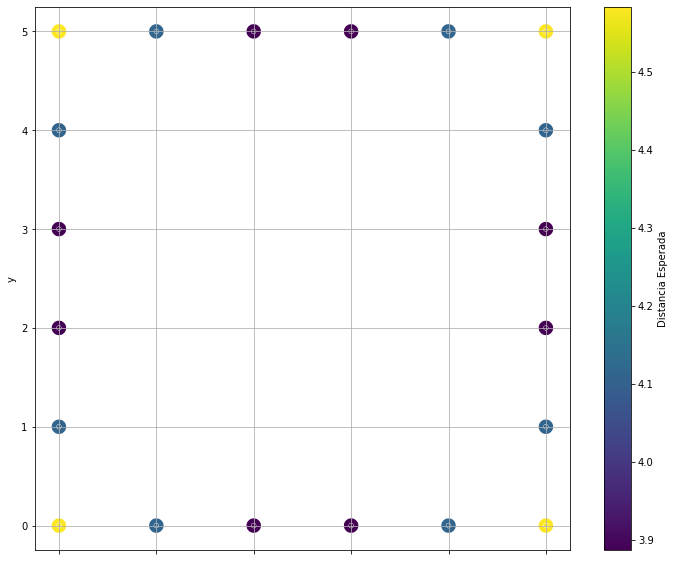

In [17]:
expected_E.plot(kind='scatter',
                x='x',y='y', linewidths=10,
                figsize=(12,10), grid=True,
                c='Distancia Esperada', cmap='viridis');

## f) 20 puntos distribuidos en cuadro menos 1

In [18]:
# Elegimos el punto a eliminar aleatoriamente
pointToErase = random.randint(0,19)
finalPoints_f = finalPoints_e.copy()
# Eliminamos el punto
finalPoints_f.pop(pointToErase);

In [19]:
# Se obtiene la distancia esperada entre cada punto y los demas
expected_F = expectedDistance(finalPoints_f)
expected_F

,x,y,r,theta,Distancia Esperada
0,5.0,4.0,6.403,38.7,3.882330
1,5.0,3.0,5.831,31.0,3.637769
2,5.0,2.0,5.385,21.8,3.608443
3,5.0,1.0,5.099,11.3,3.797121
4,5.0,0.0,5.000,0.0,4.228026
5,4.0,0.0,4.000,0.0,3.787449
6,3.0,0.0,3.000,0.0,3.587045
7,2.0,0.0,2.000,0.0,3.602942
8,1.0,0.0,1.000,0.0,3.833613
9,0.0,0.0,0.000,0.0,4.300476


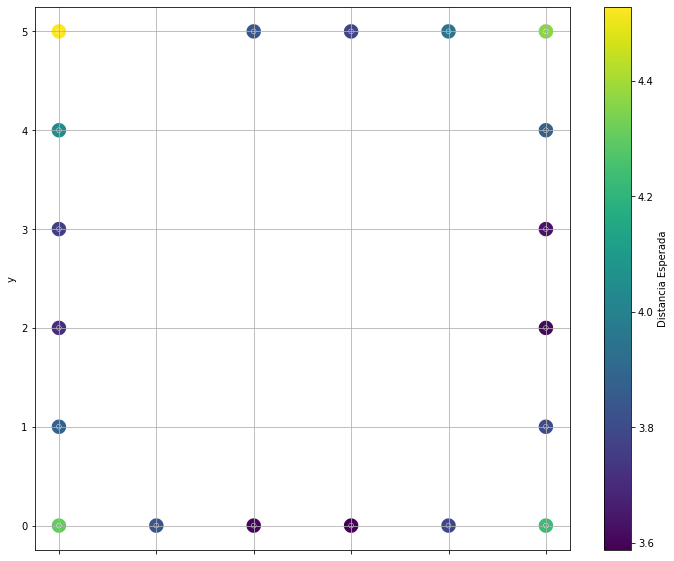

In [20]:
expected_F.plot(kind='scatter',
                x='x',y='y', linewidths=10,
                figsize=(12,10), grid=True,
                c='Distancia Esperada', cmap='viridis');